
# 기계학습 과제
### 주제 : fashion_mnist 데이터를 사용해서 accuracy를 제일 높게 얻기
- 기존 실습에서 했던 것을 기반으로 직접 모델을 자유롭게 구현
- 하이퍼파라메터는 자유롭게 변동 가능
- data augmentation 가능 
  - 한다면 왜 그렇게 적용했는지, 어떤 영향이 있는지 설명
- 최종 accuracy을 출력하고, 학습곡선 그래프 그리기  
- 코드를 돌리고 결과물이 다 남아있도록 저장 후 본 ipynb 파일(파일>다운로드>.ipynb 다운로드) 과  pdf 파일(파일>인쇄>pdf로 저장) 제출



### 학번 : 201814471
### 이름 : 서지희
### 제출일 : 2021-06-18

In [46]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping




In [47]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [48]:
tf.random.set_seed(715)
mlp = Sequential()
mlp.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=28, padding='same'))
mlp.add(BatchNormalization())
mlp.add(Activation('relu'))
mlp.add(Conv2D(kernel_size=(3,3), filters=28, strides = (1,1), padding='same'))
mlp.add(BatchNormalization())
mlp.add(Activation('relu'))
mlp.add(MaxPool2D(strides=(2,2)))
mlp.add(Dropout(rate=0.3))

mlp.add(Conv2D(kernel_size=(3,3), filters=28, strides = (1,1), padding='same'))
mlp.add(BatchNormalization())
mlp.add(Activation('relu'))
mlp.add(Conv2D(kernel_size=(3,3), filters=28, strides = (1,1), padding='same'))
mlp.add(BatchNormalization())
mlp.add(Activation('relu'))
mlp.add(Conv2D(kernel_size=(3,3), filters=28, padding='same'))
mlp.add(BatchNormalization())
mlp.add(Activation('relu'))
mlp.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
mlp.add(Dropout(rate=0.3))

mlp.add(Flatten())


mlp.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,),kernel_initializer='he_normal', bias_initializer='zeros'))
mlp.add(Dropout(rate=0.5))
#mlp.add(Dense(units=n_hidden2, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))
#mlp.add(Dropout(rate=0.3))
#mlp.add(Dense(units=n_hidden3, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))
#mlp.add(Dense(units=n_hidden4, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))
#mlp.add(Dropout(rate=0.5))
mlp.add(Dense(units=n_hidden4, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='softmax', kernel_initializer='he_normal', bias_initializer='zeros'))

In [49]:

# 신경망 학습
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test),verbose=2
              , callbacks = early_stop)

# 학습된 신경망으로 예측
res = mlp.evaluate(X_test, y_test, verbose=0)
print('accuracy = ',res[1]*100)


Epoch 1/50
469/469 - 4s - loss: 0.6770 - accuracy: 0.7643 - val_loss: 0.5363 - val_accuracy: 0.8315
Epoch 2/50
469/469 - 3s - loss: 0.3996 - accuracy: 0.8516 - val_loss: 0.3283 - val_accuracy: 0.8793
Epoch 3/50
469/469 - 3s - loss: 0.3346 - accuracy: 0.8769 - val_loss: 0.2978 - val_accuracy: 0.8890
Epoch 4/50
469/469 - 3s - loss: 0.2974 - accuracy: 0.8894 - val_loss: 0.2718 - val_accuracy: 0.8980
Epoch 5/50
469/469 - 3s - loss: 0.2777 - accuracy: 0.8973 - val_loss: 0.2909 - val_accuracy: 0.8913
Epoch 6/50
469/469 - 3s - loss: 0.2570 - accuracy: 0.9053 - val_loss: 0.2378 - val_accuracy: 0.9123
Epoch 7/50
469/469 - 3s - loss: 0.2402 - accuracy: 0.9117 - val_loss: 0.2213 - val_accuracy: 0.9191
Epoch 8/50
469/469 - 3s - loss: 0.2325 - accuracy: 0.9152 - val_loss: 0.2243 - val_accuracy: 0.9203
Epoch 9/50
469/469 - 3s - loss: 0.2212 - accuracy: 0.9190 - val_loss: 0.2141 - val_accuracy: 0.9229
Epoch 10/50
469/469 - 3s - loss: 0.2125 - accuracy: 0.9213 - val_loss: 0.2060 - val_accuracy: 0.9246

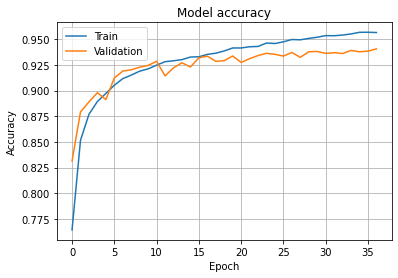

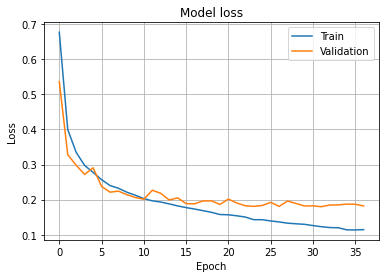

In [50]:

import matplotlib.pyplot as plt

# accuracy 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()
